In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.formula.api as smf

In [2]:
path = r'/Users/katiacordoba/Documents/GitHub/policy_lab_ndi/data/indices_and_controls.csv'
ndi_df = pd.read_csv(path)

In [3]:
ndi_df

,country_standard,year,transparency_index,accountability_index,trust_index,corruption_index,effectiveness_index,budget_participation_index,budget_transparency_index,pandemic_dem_violation_index,covid_index,gdp,gini,gdp_percap,gdp_percap_ppp_covid,percap_domestic_health_expenditure,percap_domestic_health_expenditure_ppp,median_age,aged_65_older,gdp_percap_ppp
0,Afghanistan,2006,0.398481,0.621583,NaN,0.899492,0.109936,1.0,0.333333,0.214286,0.013742,1.929110e+10,NaN,507.103432,2156.419482,2.578007,9.641537,18.6,2.581,1077.761907
1,Afghanistan,2007,0.404977,0.623198,NaN,0.910703,0.133040,1.0,0.333333,0.214286,0.013742,1.929110e+10,NaN,507.103432,2156.419482,2.578007,9.641537,18.6,2.581,1228.704135
2,Afghanistan,2008,0.391248,0.629477,NaN,0.933634,0.143647,1.0,0.333333,0.214286,0.013742,1.929110e+10,NaN,507.103432,2156.419482,2.578007,9.641537,18.6,2.581,1272.573204
3,Afghanistan,2009,0.115751,0.630297,NaN,0.933071,0.144919,1.0,0.333333,0.214286,0.013742,1.929110e+10,NaN,507.103432,2156.419482,2.578007,9.641537,18.6,2.581,1519.692548
4,Afghanistan,2010,0.112175,0.627897,NaN,0.939024,0.147968,1.0,0.333333,0.214286,0.013742,1.929110e+10,NaN,507.103432,2156.419482,2.578007,9.641537,18.6,2.581,1710.575645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3530,Zimbabwe,2016,0.390190,0.501289,NaN,0.850148,0.241040,0.0,0.000000,0.500000,0.279450,2.144076e+10,44.3,1463.985910,2961.446428,39.249222,55.387615,19.6,2.822,2806.458631
3531,Zimbabwe,2017,0.388089,0.543230,NaN,0.851687,0.237870,0.0,0.000000,0.500000,0.279450,2.144076e+10,44.3,1463.985910,2961.446428,39.249222,55.387615,19.6,2.822,3028.245976
3532,Zimbabwe,2018,0.146885,0.533216,NaN,0.847306,0.236812,0.0,0.000000,0.500000,0.279450,2.144076e+10,44.3,1463.985910,2961.446428,39.249222,55.387615,19.6,2.822,3206.277079
3533,Zimbabwe,2019,0.394583,0.504282,NaN,0.836403,0.261814,0.0,0.000000,0.500000,0.279450,2.144076e+10,44.3,1463.985910,2961.446428,39.249222,55.387615,19.6,2.822,2961.446428


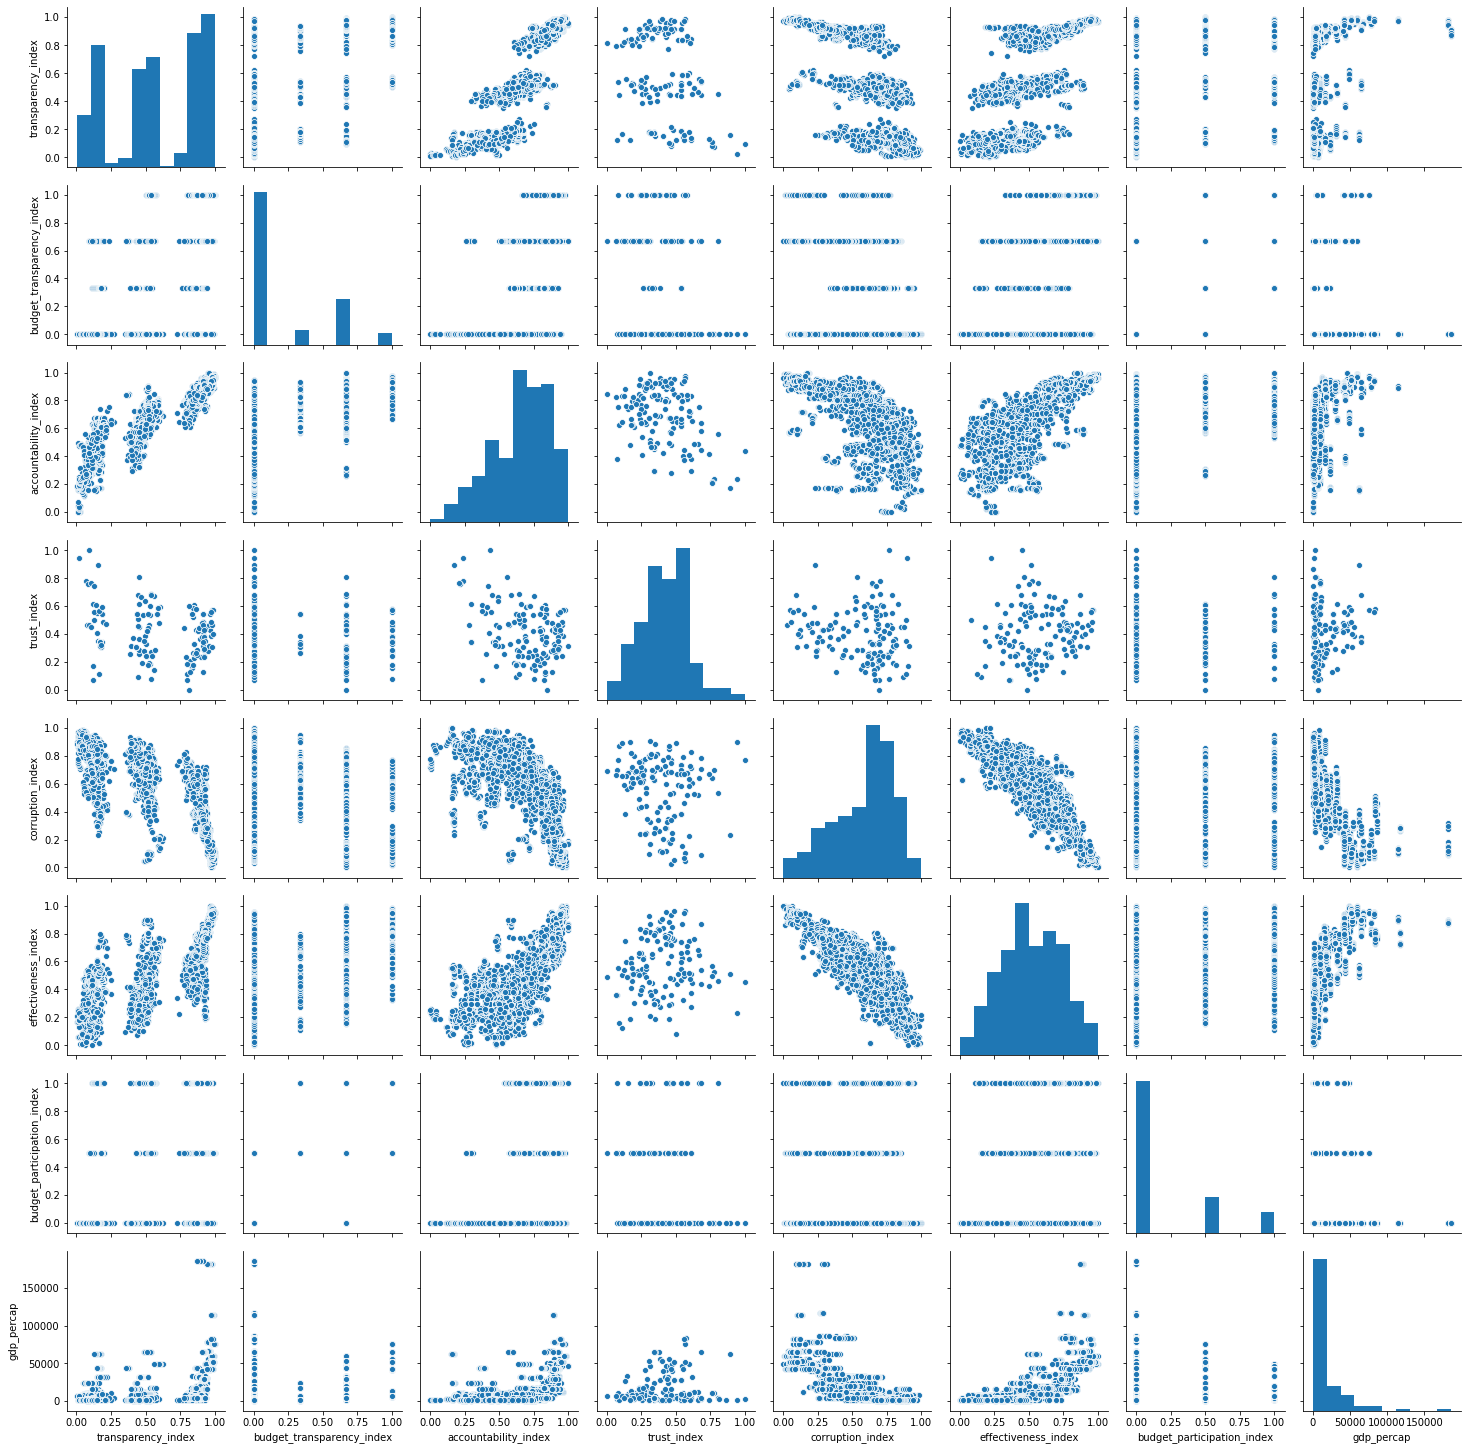

In [24]:
#Transparency without covid models
#pairplot = sns.pairplot(data = ndi_df, vars=['transparency_index', 'budget_transparency_index', 'accountability_index', 'trust_index', 'corruption_index', 'effectiveness_index', 'budget_participation_index', 'gdp_percap'])

In [5]:
#pairplot.savefig("Transparency without covid models.png")

In [6]:
#Accountability
available_data = ndi_df.loc[:,['accountability_index', 'transparency_index', 'gdp_percap_ppp', 'country_standard']].dropna(how='any')
reg_accountability = smf.ols('accountability_index ~ transparency_index + gdp_percap_ppp + C(country_standard)', available_data).fit(cov_type='cluster', cov_kwds={'groups': available_data['country_standard']})

In [7]:
#Corruption
corr = ndi_df.loc[:,['corruption_index', 'transparency_index', 'gdp_percap_ppp', 'country_standard']].dropna(how='any')
reg_corruption = smf.ols('corruption_index ~ transparency_index + gdp_percap_ppp + C(country_standard)', corr).fit(cov_type='cluster', cov_kwds={'groups': corr['country_standard']})

In [8]:
#Trust
trust = ndi_df.loc[:,['trust_index', 'transparency_index', 'gdp_percap_ppp', 'country_standard']].dropna(how='any')
reg_trust = smf.ols('trust_index ~ transparency_index + gdp_percap_ppp + C(country_standard)', trust).fit(cov_type='cluster', cov_kwds={'groups': trust['country_standard']})

In [9]:
#Effectiveness
effect = ndi_df.loc[:,['effectiveness_index', 'transparency_index', 'gdp_percap_ppp', 'country_standard']].dropna(how='any')
reg_effectiveness = smf.ols('effectiveness_index ~ transparency_index + gdp_percap_ppp + C(country_standard)', effect, missing='drop').fit(cov_type='cluster', cov_kwds={'groups': effect['country_standard']})

In [10]:
#Budget Participation
budget_particip = ndi_df.loc[:,['budget_participation_index', 'transparency_index', 'gdp_percap_ppp', 'country_standard']].dropna(how='any')
reg_bugetparticipation = smf.ols('budget_participation_index ~ transparency_index + gdp_percap_ppp + C(country_standard)', budget_particip).fit(cov_type='cluster', cov_kwds={'groups': budget_particip['country_standard']})

In [11]:
#Budget Transparency
budget_transp = ndi_df.loc[:,['budget_transparency_index', 'transparency_index', 'gdp_percap_ppp', 'country_standard']].dropna(how='any')
reg_buget_transparency = smf.ols('budget_transparency_index ~ transparency_index + gdp_percap_ppp + C(country_standard)', budget_transp).fit(cov_type='cluster', cov_kwds={'groups': budget_transp['country_standard']})

In [12]:
tables = []
values = [reg_accountability, reg_corruption, reg_trust, reg_effectiveness, reg_bugetparticipation, reg_buget_transparency]
for value in values:
    LRresult = value.summary2().tables[1]
    some_values = ['Intercept', 'transparency_index', 'gdp_percap_ppp']
    LRresult = LRresult.loc[LRresult.index.isin(some_values)]#.style.apply(highlight_1, axis=1)
    tables.append(LRresult)

/Users/katiacordoba/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 172, but rank is 2
  'rank is %d' % (J, J_), ValueWarning)
/Users/katiacordoba/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 190, but rank is 2
  'rank is %d' % (J, J_), ValueWarning)
/Users/katiacordoba/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 77, but rank is 2
  'rank is %d' % (J, J_), ValueWarning)
/Users/katiacordoba/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 189, but rank is 2
  'rank is %d' % (J, J_), ValueWarning)
/Users/katiac

In [13]:
#Call on tables to show all of them or by index: tables[i] 
tables[5]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,3.333333e-01,8.098985e-12,4.115742e+10,0.000000,3.333333e-01,3.333333e-01
transparency_index,9.189871e-13,2.194662e-13,4.187374e+00,0.000028,4.888413e-13,1.349133e-12
gdp_percap_ppp,4.586154e-17,9.519366e-18,4.817710e+00,0.000001,2.720393e-17,6.451915e-17


In [14]:
#Select years greater than 2018 for next two models 
df_2020 = ndi_df.loc[ndi_df['year'] > 2018]

In [15]:
df_2020

,country_standard,year,transparency_index,accountability_index,trust_index,corruption_index,effectiveness_index,budget_participation_index,budget_transparency_index,pandemic_dem_violation_index,covid_index,gdp,gini,gdp_percap,gdp_percap_ppp_covid,percap_domestic_health_expenditure,percap_domestic_health_expenditure_ppp,median_age,aged_65_older,gdp_percap_ppp
13,Afghanistan,2019,0.163570,0.590704,NaN,0.900596,0.139305,1.0,0.333333,0.214286,0.013742,1.929110e+10,NaN,507.103432,2156.419482,2.578007,9.641537,18.6,2.581,2156.419482
27,Albania,2019,0.554243,0.725007,NaN,0.691994,0.528098,0.5,0.666667,0.357143,0.540872,1.527918e+10,33.2,5353.244856,14648.267402,148.436569,376.501373,38.0,13.188,14648.267402
41,Algeria,2019,0.157443,0.416367,NaN,0.702728,0.352232,0.0,0.000000,0.428571,0.011908,1.710913e+11,27.6,3973.964072,12019.928356,168.449661,633.798828,29.1,6.211,12019.928356
55,American Samoa,2019,NaN,NaN,NaN,0.143812,0.631710,0.0,0.000000,NaN,NaN,6.360000e+08,NaN,11466.690706,NaN,NaN,NaN,NaN,NaN,NaN
69,Andorra,2019,0.926096,NaN,NaN,0.284371,NaN,0.0,0.000000,NaN,0.919778,3.154058e+09,NaN,40886.391165,NaN,1916.984497,2450.407959,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3491,Yemen,2019,0.067556,0.274884,NaN,0.938612,0.021317,0.0,0.000000,NaN,0.031210,2.258108e+10,36.7,774.334490,3688.519849,7.451180,14.315764,20.3,2.922,NaN
3505,Zambia,2019,0.500186,0.633221,NaN,0.710546,0.339228,0.0,0.000000,0.428571,0.406037,2.330977e+10,57.1,1305.063254,3624.024939,29.700403,81.467789,17.7,2.480,3624.024939
3519,Zanzibar,2019,NaN,0.481492,NaN,NaN,NaN,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3533,Zimbabwe,2019,0.394583,0.504282,NaN,0.836403,0.261814,0.0,0.000000,0.500000,0.279450,2.144076e+10,44.3,1463.985910,2961.446428,39.249222,55.387615,19.6,2.822,2961.446428


In [16]:
#Fill NA values with previous year
df_2020['transparency_index'].fillna(method='ffill', inplace=True)

/Users/katiacordoba/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [17]:
#Keep only 2020
df_2020 = df_2020.loc[df_2020['year'] == 2020]

In [18]:
df_2020

,country_standard,year,transparency_index,accountability_index,trust_index,corruption_index,effectiveness_index,budget_participation_index,budget_transparency_index,pandemic_dem_violation_index,covid_index,gdp,gini,gdp_percap,gdp_percap_ppp_covid,percap_domestic_health_expenditure,percap_domestic_health_expenditure_ppp,median_age,aged_65_older,gdp_percap_ppp
960,Ethiopia,2020,0.156400,NaN,0.541624,NaN,NaN,0.0,0.000000,0.285714,0.235592,9.591259e+10,35.0,855.760862,2319.707378,5.661227,15.572806,19.8,3.526,NaN
1199,Guatemala,2020,0.496823,NaN,0.077618,NaN,NaN,1.0,0.666667,0.357143,0.377813,7.671036e+10,48.3,4619.985258,9019.693804,93.486130,173.908356,22.9,4.694,NaN
1453,Iran,2020,0.116422,NaN,0.583046,NaN,NaN,0.0,0.000000,0.357143,0.514688,4.539965e+11,40.8,5550.060957,12937.475980,222.420959,776.789001,32.4,5.440,NaN
1664,Kyrgyzstan,2020,0.479062,NaN,0.341828,NaN,NaN,0.0,0.000000,0.571429,0.006079,8.454620e+09,27.7,1309.392992,5485.560329,36.723625,111.334984,26.3,4.489,NaN
1805,Macao SAR China,2020,0.973647,NaN,0.576210,NaN,NaN,0.0,0.000000,NaN,NaN,5.385912e+10,NaN,84096.396311,129451.063933,NaN,NaN,NaN,NaN,NaN
2072,Myanmar (Burma),2020,0.432114,NaN,0.659180,NaN,NaN,0.0,0.000000,0.357143,0.362541,7.608585e+10,30.7,1407.813143,5369.707495,8.779543,43.261250,29.1,5.732,NaN
2166,New Zealand,2020,0.979150,NaN,0.555966,NaN,NaN,0.5,1.000000,0.000000,0.691548,2.069288e+11,NaN,42084.353375,45382.123508,3021.277100,3011.491943,37.9,15.322,NaN
2181,Nicaragua,2020,0.152579,NaN,0.199680,NaN,NaN,0.0,0.000000,0.428571,0.017535,1.252092e+10,46.2,1912.903745,5646.399468,103.936005,283.472290,27.3,5.445,NaN
2606,Portugal,2020,0.938392,NaN,0.339723,NaN,NaN,0.5,0.333333,0.000000,0.783658,2.387851e+11,33.8,23252.058518,37918.446865,1361.255127,1992.470581,46.2,21.502,NaN
3167,Tajikistan,2020,0.059708,NaN,0.865473,NaN,NaN,0.0,0.000000,0.428571,0.020865,8.116627e+09,34.0,870.787589,3529.311126,16.184902,67.545227,23.3,3.466,NaN


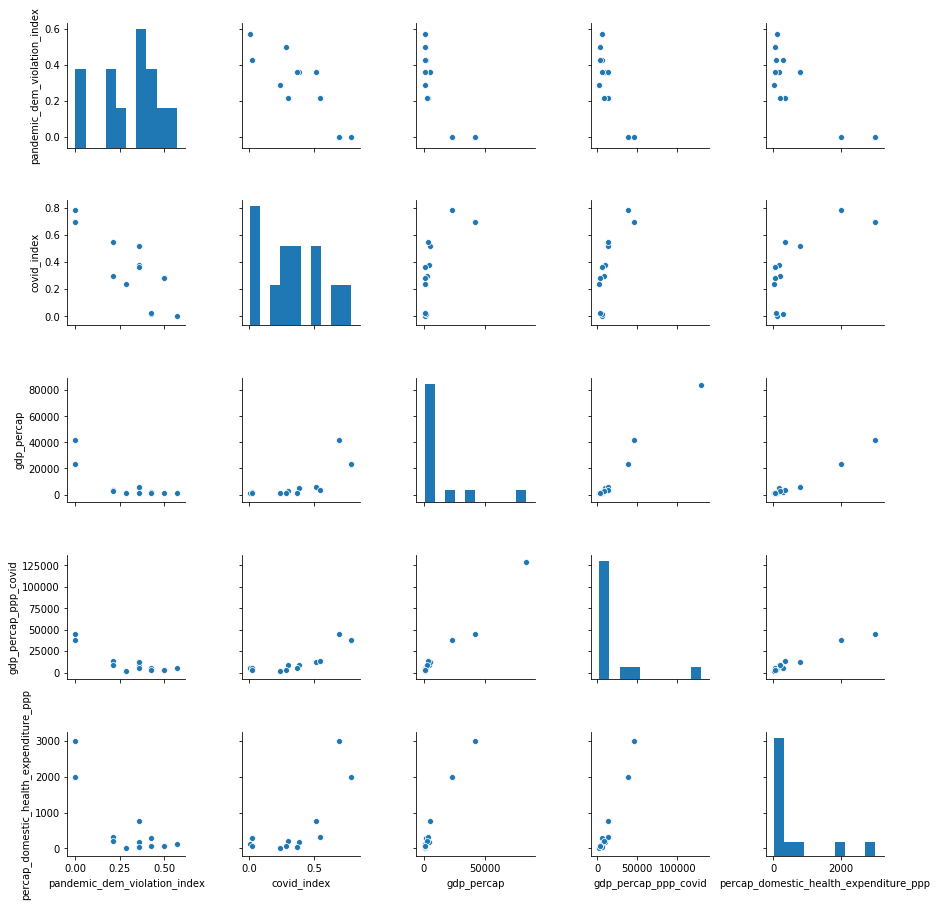

In [25]:
pp = sns.pairplot(data = df_2020, vars=['pandemic_dem_violation_index', 'covid_index', 'gdp_percap', 'gdp_percap_ppp_covid', 'percap_domestic_health_expenditure_ppp']) 

In [20]:
#COVID outcomes model Not significant (significant without age controls) 
reg_covid = smf.ols('covid_index ~ transparency_index +  gdp_percap_ppp_covid + percap_domestic_health_expenditure_ppp + median_age + aged_65_older', df_2020).fit()

In [21]:
LRresult = reg_covid.summary2().tables[1]
LRresult

/Users/katiacordoba/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,-0.014515,0.458062,-0.031687,0.975749,-1.135352,1.106323
transparency_index,-0.045456,0.430344,-0.105628,0.919320,-1.098470,1.007557
gdp_percap_ppp_covid,0.000044,0.000050,0.876181,0.414629,-0.000078,0.000166
percap_domestic_health_expenditure_ppp,-0.000425,0.000572,-0.743798,0.485096,-0.001825,0.000974
median_age,0.003920,0.021946,0.178624,0.864112,-0.049780,0.057621
aged_65_older,-0.005663,0.039832,-0.142184,0.891589,-0.103128,0.091801


In [22]:
#Significant and positive (negative without gdp and health) more to explore here 
reg_pandemic_violations = smf.ols('pandemic_dem_violation_index ~ transparency_index + gdp_percap_ppp_covid + percap_domestic_health_expenditure_ppp + aged_65_older + median_age', df_2020).fit()

In [23]:
LRresult = reg_pandemic_violations.summary2().tables[1]
LRresult

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,0.198705,0.213220,0.931926,0.387338,-0.323025,0.720436
transparency_index,0.432958,0.200318,2.161356,0.073938,-0.057202,0.923117
gdp_percap_ppp_covid,-0.000036,0.000023,-1.546996,0.172827,-0.000093,0.000021
percap_domestic_health_expenditure_ppp,0.000299,0.000266,1.123849,0.304021,-0.000352,0.000951
aged_65_older,-0.023920,0.018541,-1.290112,0.244499,-0.069288,0.021448
median_age,0.013618,0.010216,1.333057,0.230895,-0.011379,0.038615
